In [6]:
import csv
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [10]:
# Input file and output file names
input_file = 'perceptron_toydata.txt'
train_file = 'train_data.csv'
valid_file = 'valid_data.csv'

# Open the input file for reading
with open(input_file, 'r') as infile:
    # Read lines from the input file
    lines = infile.readlines()

# Create a list to store the data
data = []

# Process each line and split it by whitespace
for line in lines:
    values = line.strip().split('\t')
    
    if len(values) == 3:
        feature1, feature2, label = values
        data.append([feature1, feature2, label])

# Shuffle the data randomly
random.shuffle(data)

# Calculate the split ratio (e.g., 80% for training and 20% for validation)
split_ratio = 0.6
split_index = int(split_ratio * len(data))

# Split the data into training and validation sets
train_data = data[:split_index]
valid_data = data[split_index:]

# Create a new CSV file for training data and write the data with column headers
with open(train_file, 'w', newline='') as trainfile:
    writer = csv.writer(trainfile)
    writer.writerow(["feature 1", "feature 2", "label"])
    writer.writerows(train_data)

print(f"Training CSV file '{train_file}' has been created.")

# Create a new CSV file for validation data and write the data with column headers
with open(valid_file, 'w', newline='') as validfile:
    writer = csv.writer(validfile)
    writer.writerow(["feature 1", "feature 2", "label"])
    writer.writerows(valid_data)

print(f"Validation CSV file '{valid_file}' has been created.")


Training CSV file 'train_data.csv' has been created.
Validation CSV file 'valid_data.csv' has been created.


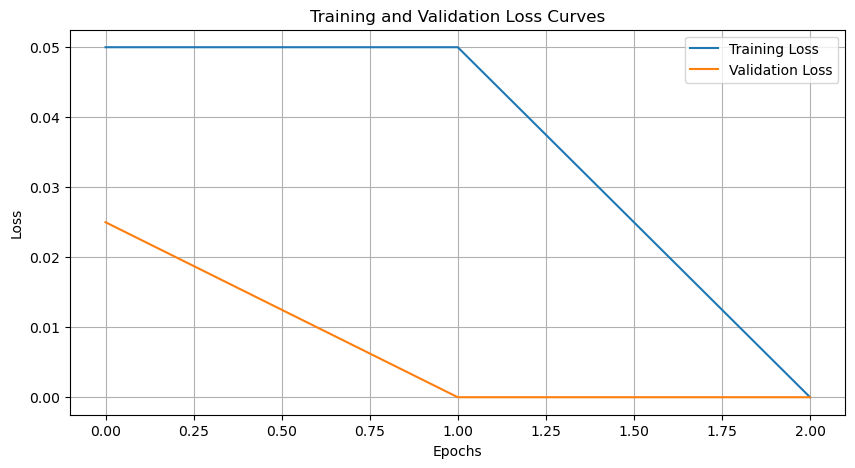

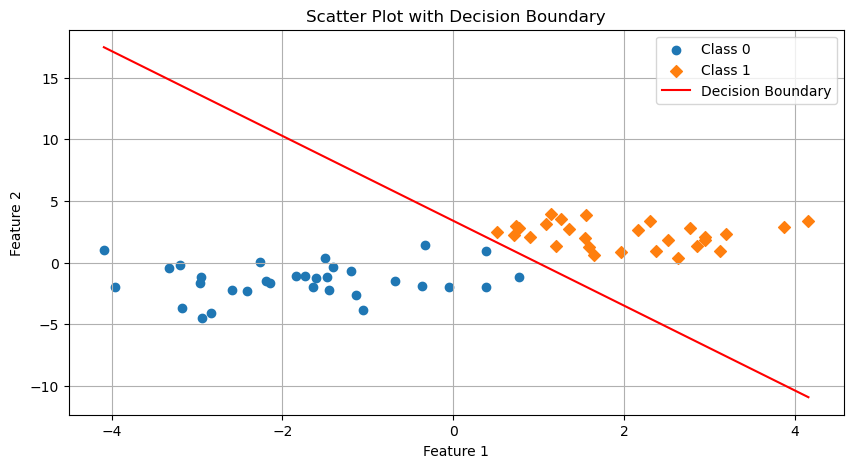

Validation Accuracy: 100.00%


''

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

class Perceptron:
    def __init__(self, num_features, learning_rate=0.1):
        self.weights = np.zeros(num_features)
        self.learning_rate = learning_rate
        self.loss_history = []

    def predict(self, features):
        weighted_sum = np.dot(self.weights, features)
        prediction = 1 if weighted_sum > 0 else 0
        return prediction

    def train(self, features, target):
        prediction = self.predict(features)
        error = target - prediction
        self.weights += self.learning_rate * error * features
        loss = error ** 2
        self.loss_history.append(loss)

# Load training and validation data using Pandas
train_data = pd.read_csv('train_data.csv')
valid_data = pd.read_csv('valid_data.csv')

# Extract features and labels
train_features = train_data[['feature 1', 'feature 2']].to_numpy()
train_labels = train_data['label'].to_numpy()

valid_features = valid_data[['feature 1', 'feature 2']].to_numpy()
valid_labels = valid_data['label'].to_numpy()

# Add a bias term (constant 1) to the features
train_features = np.column_stack((train_features, np.ones(len(train_data))))
valid_features = np.column_stack((valid_features, np.ones(len(valid_data))))

# Create a Perceptron with 3 input features (including the bias term)
perceptron = Perceptron(3)

# Training and validation loss history
train_loss_history = []
valid_loss_history = []

# Train the perceptron on the training data
for epoch in range(3):  # Adjust the number of epochs as needed
    for features, target in zip(train_features, train_labels):
        perceptron.train(features, target)

    # Calculate training loss for the epoch
    train_loss = np.mean(perceptron.loss_history)
    train_loss_history.append(train_loss)
    perceptron.loss_history = []  # Clear the loss history for the next epoch

    # Calculate validation loss at the end of each epoch
    valid_loss = 0
    for features, target in zip(valid_features, valid_labels):
        prediction = perceptron.predict(features)
        error = target - prediction
        valid_loss += error ** 2
    valid_loss /= len(valid_features)
    valid_loss_history.append(valid_loss)

# Plot the training and validation loss curves
plt.figure(figsize=(10, 5))
plt.plot(train_loss_history, label='Training Loss')
plt.plot(valid_loss_history, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss Curves')
plt.grid(True)

# Plot features1 and features2 with the decision boundary
plt.figure(figsize=(10, 5))
plt.scatter(train_data[train_data['label'] == 0]['feature 1'], train_data[train_data['label'] == 0]['feature 2'], label='Class 0', marker='o')
plt.scatter(train_data[train_data['label'] == 1]['feature 1'], train_data[train_data['label'] == 1]['feature 2'], label='Class 1', marker='D')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

# Corrected decision boundary line
x_values = np.linspace(min(train_data['feature 1']), max(train_data['feature 1']), 100)
y_values = -(perceptron.weights[0] / perceptron.weights[1]) * x_values - (perceptron.weights[2] / perceptron.weights[1])

plt.plot(x_values, y_values, label='Decision Boundary', color='red')

plt.legend()
plt.title('Scatter Plot with Decision Boundary')
plt.grid(True)

plt.show()

# Calculate validation accuracy
correct_predictions = 0
total_valid_samples = len(valid_data)

for features, target in zip(valid_features, valid_labels):
    prediction = perceptron.predict(features)
    if prediction == target:
        correct_predictions += 1

accuracy = correct_predictions / total_valid_samples
print(f"Validation Accuracy: {accuracy * 100:.2f}%")
""